# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **1** (*variety A*)
- **2** (*variety B*)
- **3** (*variety C*)

In [1]:
# Load wine dataset
import pandas as pd
wine = pd.read_csv('winedata.csv', names=["Identifier", 
                                          "Alcohol", 
                                          "Malic Acid", 
                                          "Ash", 
                                          "Alcalinity of ash", 
                                          "Magnesium", 
                                          "Total phenols", 
                                          "Flavanoids", 
                                          "Nonflavanoid phenols", 
                                          "Proanthocyanins", 
                                          "Color intensity", 
                                          "Hue", 
                                          "OD280/OD315 of diluted wines", 
                                          "Proline"])
# Look at the structure of the table...
print(wine.shape)
print(wine.head())

(178, 14)
   Identifier  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.

We can see that the dataset consists of 13 continuous features with 1 classification label: Identifier

Let us now match up the varieties (A, B, and C).

In [2]:
# Adjust the identifier to read from 0 to 2 to aid in array manipulation and model processing for the future:
wine['NewIdentifier'] = wine.Identifier-1

# Preview data:
sample = wine.sample(10)
sample

,Identifier,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,NewIdentifier
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,2
27,1,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285,0
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,2
149,3,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,2
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
34,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095,0
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
80,2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,1
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,0
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,0


In [3]:
# Match the NewIdentifier to the Variety, indicating easier array manipulation in the dataset has been implemented.
wine_classes = ["Variety A", "Variety B", "Variety C"]
print(sample.columns[14], 'WineVariety')
for index, row in wine.sample(10).iterrows():
    print('[',int(row[14]),']',wine_classes[int(row[14])])

NewIdentifier WineVariety
[ 0 ] Variety A
[ 2 ] Variety C
[ 0 ] Variety A
[ 0 ] Variety A
[ 0 ] Variety A
[ 1 ] Variety B
[ 2 ] Variety C
[ 1 ] Variety B
[ 0 ] Variety A
[ 0 ] Variety A


Above we can see that our new identifier matches up with a specific type of wine: varities of A, B, and C, where identity 0 is A, 1 is B, and 2 is C.

Let us further check over the dataset to see if there are any missing values before finalizing the dataset:

In [4]:
wine.isnull().sum()

Identifier                      0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
NewIdentifier                   0
dtype: int64

Above we see that there are no missing values in our dataset, so we can continue on and finalize our dataset.

In [5]:
# Finalize dataset
wine_f = wine.loc[:, wine.columns!='Identifier']
wine_f

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,NewIdentifier
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


## Visualize potential relations
Next we are going to use box plots to quickly analyze how each of the continuos features may relate to the label (Variety).

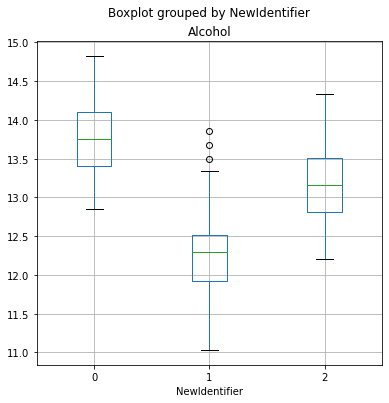

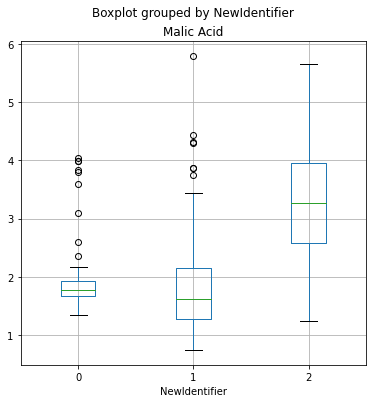

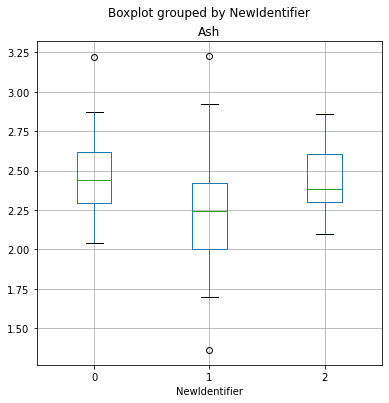

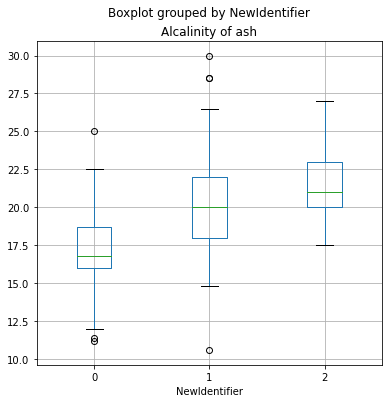

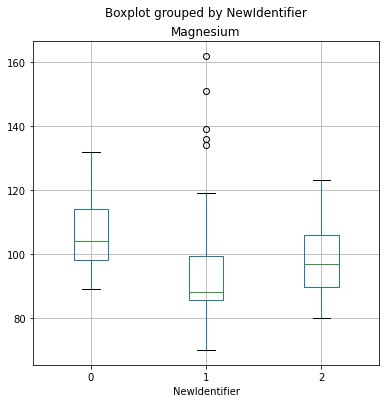

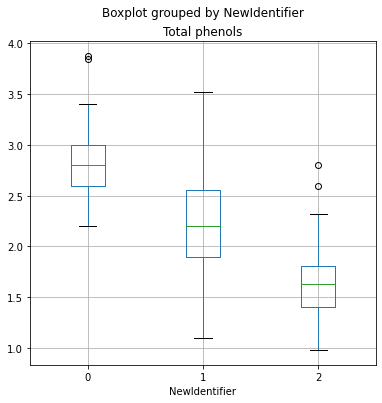

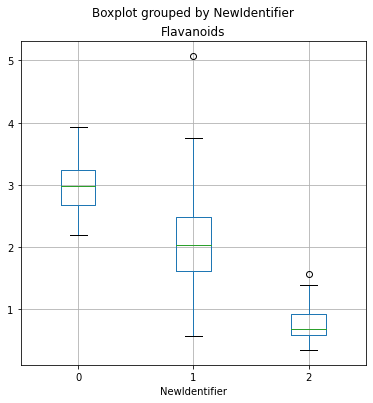

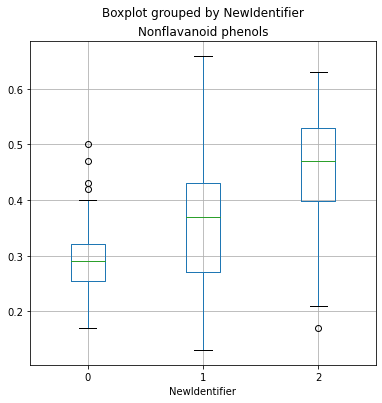

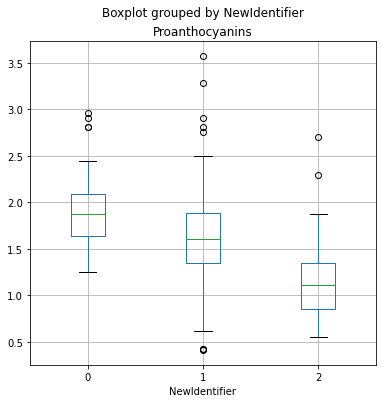

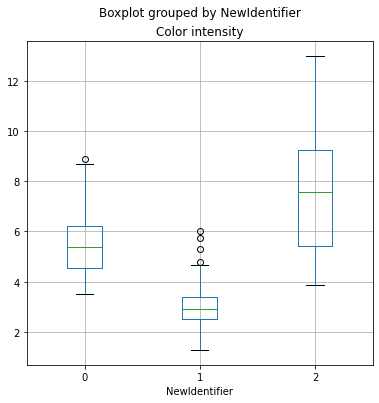

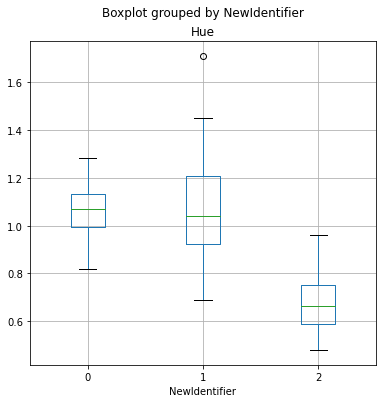

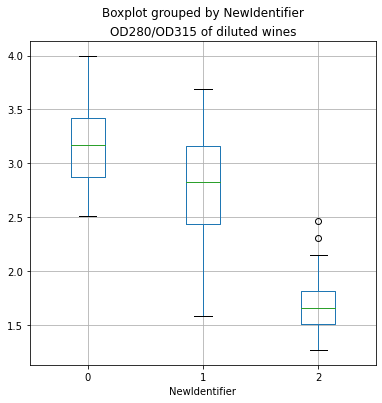

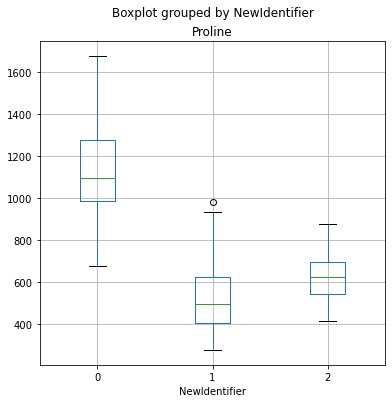

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

wine_features = ['Alcohol','Malic Acid','Ash',
                 'Alcalinity of ash', "Magnesium",
                 'Total phenols', 'Flavanoids', 
                 'Nonflavanoid phenols', 
                 'Proanthocyanins', 'Color intensity', 
                 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_label = 'NewIdentifier'
for col in wine_features:
    wine_f.boxplot(column=col, by=wine_label, figsize=(6,6))
    plt.title(col)
plt.show()

Glancing over the box plots, one can quickly see how there are features that provide distinctions amongst the wine varieties. An example is that Proline appears to be higher on average in Variety A and much lower in Variety B. Similarily, there are some boxplots that may cause our model to make poor decisions due to how close all of the averages are.

## Prepare data for modeling
In order to model the data and create predictions, we need to create training sets and test sets for the model to train and make predictions with. Once this is complete, we will optimize our model.

Since we want to use our features to predict a multiclass label, we will need to build a multiclass classification model.

In [35]:
from sklearn.model_selection import train_test_split

# Separate featutes and labels
X_wine, y_wine = wine_f[wine_features].values, wine_f[wine_label].values

# Create training and testing datasets with a 70%-30% split
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=0, stratify=y_wine)

print ('Training Set: %d, Test Set: %d \n' % (x_wine_train.shape[0], x_wine_test.shape[0]))

Training Set: 124, Test Set: 54 



## Train and evaluate the multiclass classifier
We have now separated out features and our label into training and testing sets. Let us now train a logistic regression model using using our training set to evaluate how well it can identify the label in the test set.

In [38]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistis regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_wine_train, y_wine_train)
print (multi_model)

# Now we can use the trained model to predict the labels for 
# the test features, and compare the predicted labels to the actual labels:
wine_predictions = multi_model.predict(x_wine_test)
print('Predicted labels: ', wine_predictions[:15])
print('Actual labels   : ' ,y_wine_test[:15])

LogisticRegression(C=10.0, max_iter=10000)
Predicted labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]
Actual labels   :  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]


Incredible! Our model correctly predicted 15/15 of the actual labels.
Let's look at a classification report.

In [39]:
from sklearn. metrics import classification_report

print(classification_report(y_wine_test, wine_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



Since we have multiple classes, let's focus on the overall metrics to get a sense of how well the model performs across all three classes:

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9616228070175438
Overall Recall: 0.9682539682539683


Our overall accuracy with this model is 96% in terms of determining the correct wine.

Let's now look at a confusion matrix to further evaluate our model:

In [41]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_wine_test, wine_predictions)
print(mcm)

[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


The confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map, like this:

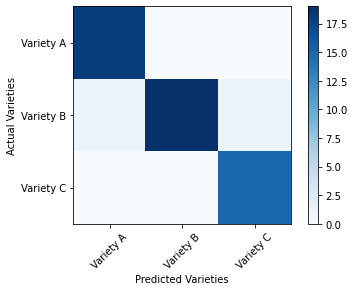

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Varieties")
plt.ylabel("Actual Varieties")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

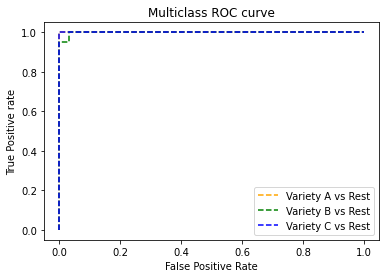

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = multi_model.predict_proba(x_wine_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wine_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [44]:
auc = roc_auc_score(y_wine_test,wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9995189995189996


The closer to one, the better your ROC curve.


Our initial model has great performance, and when looking at the confusion matrix we can see it has only made 1/27 predictions incorrectly. At this point we can either push for greater performance, or we could test our model on unseen data.

Let us push! :)


## Preprocess data in a pipeline
One can use a pipeline to apply preprocessing steps to the data before fitting it to an algorithm to train a model. Let's see if we can improve the wine predictor by scaling the numeric features in a transformation steps before training. We'll also try a different algorithm (a support vector machine), just to show that we can!

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_wine_train, y_wine_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', LogisticRegression())])


Now we can evaluate the new model.

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


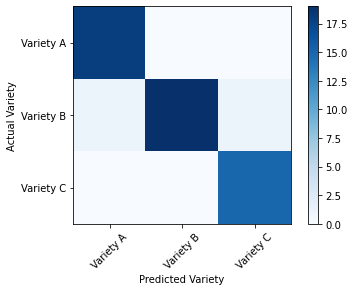

In [46]:
# Get predictions from test data
wine_predictions = multi_model.predict(x_wine_test)
wine_prob = multi_model.predict_proba(x_wine_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_wine_test,wine_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

### Use the model with new data observations

Now let's save our trained model so we can use it again later.

In [47]:
import joblib

# Save the model as a pickle file
filename = './wine_model.pkl'
joblib.dump(multi_model, filename)

['./wine_model.pkl']

OK, so now we have a trained model. Let's use it to predict the class of a new wine observation:

In [48]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple wine observations in a single call)
# We'll create an array with a two arrays of features, representing two wine observations
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])


# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + wine_classes[prediction] +')')

0 (Variety A)
1 (Variety B)


**Future note: A and B are actual answers for two arrays.**